# COVID-19 MORTALITY RATE MODEL

#### Author : Ansh Walia < username : ansh_walia , email : ansh1532.cse18@chitkara.edu.in >

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing COVID-19 Dataset

In [2]:
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.iloc[:,1:]
training_data = training_data.iloc[:,:54]
training_data.head()

,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1
2,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0
3,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,0.0300,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,0.0510,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


## Data Exploration

### Categorical Data : Severity

In [3]:
training_data['Severity'].value_counts()

All                     211
Severe/Critical Only    144
Mild only                91
Both                      5
Severe                    2
Mild                      2
Severe/critical only      2
Asymptomatic only         1
Name: Severity, dtype: int64

### Categorical Data : Ventilation

In [4]:
training_data['Ventilation'].value_counts()

Both                    197
Non-ventilation only     66
Ventilation only         19
Yes                      12
ΝΑ                        4
No                        3
Name: Ventilation, dtype: int64

### Dataset Description

In [5]:
training_data.describe()

,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,...,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection
count,252.000000,430.000000,222.00000,309.000000,325.000000,295.000000,262.000000,233.000000,192.000000,173.000000,...,123.000000,123.000000,113.000000,184.000000,176.000000,148.000000,199.000000,76.000000,101.000000,43.000000
mean,51.093536,0.547413,0.48413,0.286662,0.147790,0.142180,0.066283,0.075804,0.037113,0.104421,...,111.824878,133.465447,37.866195,29.788370,34.728409,0.739702,0.842674,0.095805,0.105184,0.114935
std,18.572915,0.263608,0.35929,0.288207,0.201715,0.241088,0.150995,0.212610,0.090475,0.450986,...,31.130855,34.388297,6.857566,17.178765,20.741019,0.317250,0.276362,0.186147,0.164716,0.186450
min,0.170000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.200000,4.500000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.300000,0.451175,0.18050,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,110.200000,135.445000,33.700000,21.000000,25.950000,0.537375,0.842000,0.000000,0.000000,0.000000
50%,52.450000,0.540600,0.40075,0.206000,0.101000,0.060500,0.017950,0.008000,0.000000,0.011000,...,118.000000,143.940000,38.400000,26.000000,30.000000,0.917750,1.000000,0.000000,0.035700,0.025000
75%,64.000000,0.670000,0.82000,0.395000,0.180000,0.150500,0.077675,0.052000,0.040000,0.079000,...,126.000000,149.750000,41.340000,32.125000,37.725000,1.000000,1.000000,0.117600,0.146000,0.148300
max,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.600000,...,163.000000,163.000000,50.400000,172.000000,219.200000,1.000000,1.000000,1.000000,1.000000,0.817000


### Mean Age Distribution Plot

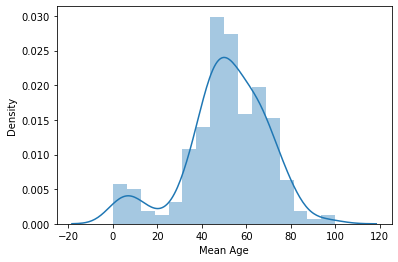

In [6]:
plt.figure()
sns.distplot(training_data.iloc[:,2])
plt.show()

### Percentage Male Distribution Plot

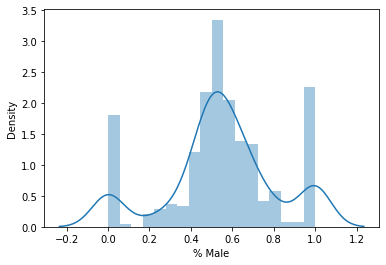

In [7]:
plt.figure()
sns.distplot(training_data.iloc[:,3])
plt.show()

### Any Comorbidity Distribution Plot

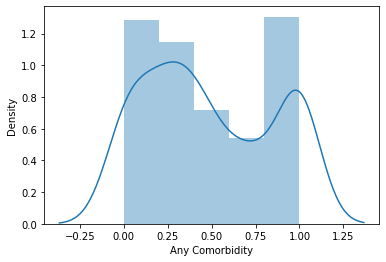

In [8]:
plt.figure()
sns.distplot(training_data.iloc[:,4])
plt.show()

### Hypertension Distribution Plot

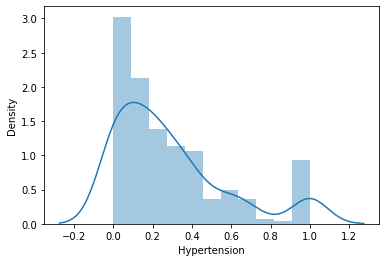

In [9]:
plt.figure()
sns.distplot(training_data.iloc[:,5])
plt.show()

### Diabetes Distribution Plot

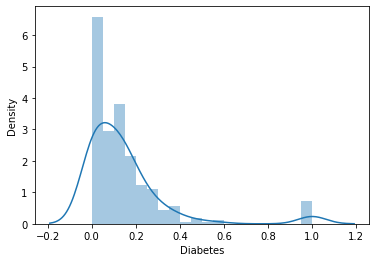

In [10]:
plt.figure()
sns.distplot(training_data.iloc[:,6])
plt.show()

## Data Preprocessing

### Missing Data Fix

In [11]:
# Missing Data
training_data.isna().sum()

Severity                                     17
Ventilation                                 174
Mean Age                                    223
% Male                                       45
Any Comorbidity                             253
Hypertension                                166
Diabetes                                    150
Cardiovascular Disease (incl. CAD)          180
Chronic obstructive lung (COPD)             213
Cancer (Any)                                242
Liver Disease (any)                         283
Cerebrovascular Disease                     302
Chronic kidney/renal disease                225
Other                                       276
Fever (temperature ≥37·3°C)                 119
Average temperature (celsius)               411
Max temperature (celsius)                   421
Respiratory rate > 24 breaths per min       437
Cough                                       135
Shortness of Breath (dyspnoea)              232
Headache                                

### Visualizing Missing Data

<AxesSubplot:>

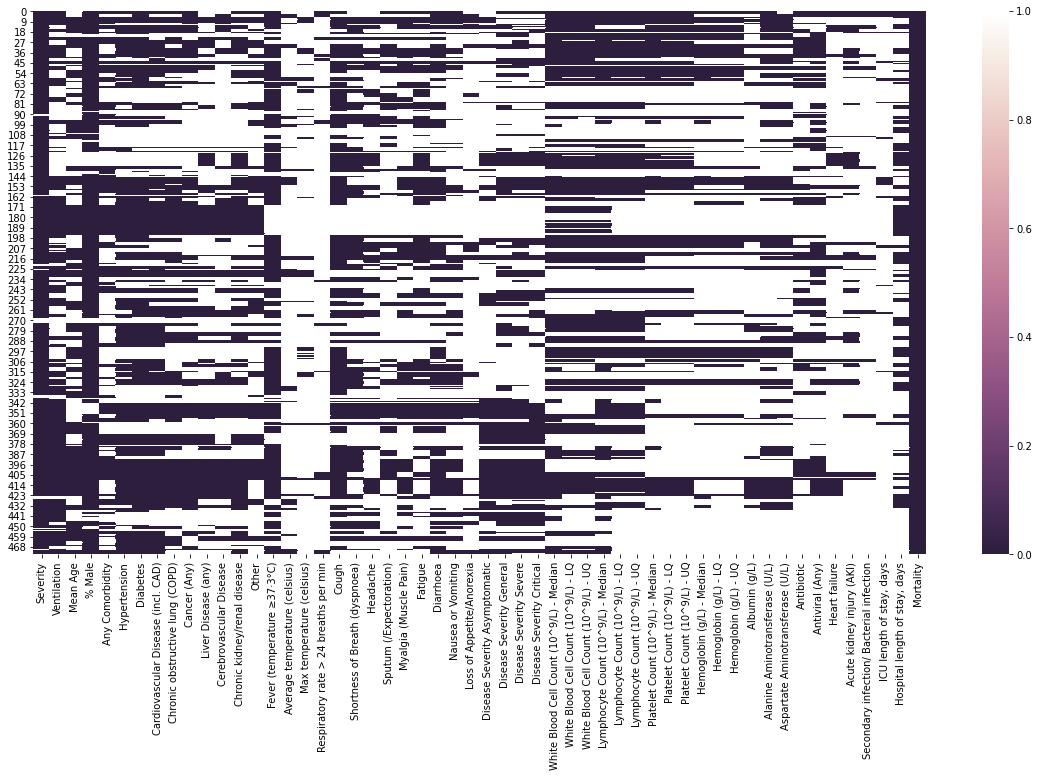

In [12]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(training_data.isna(), cmap=cmap)

### Removing Columns Where More Than 50% Data Points Are Missing

In [13]:
filtered_data = pd.DataFrame()

for column in training_data.columns:
    if(training_data[column].isna().sum() < (len(training_data.iloc[:,0])*0.50)):
        filtered_data[column] = training_data[column]

filtered_data

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Mortality
0,All,Both,NaN,0.6230,0.3000,0.1900,0.0800,0.0300,0.0168,0.9400,0.7900,NaN,0.0471,6.20,4.5,9.50,1.00,0.28
1,Severe/Critical Only,Both,NaN,0.7037,0.4815,0.3148,0.2407,0.0741,0.0370,0.9444,0.7222,NaN,0.0370,9.80,6.9,13.90,0.60,1
2,All,Both,NaN,0.5912,0.2336,0.1387,0.0146,0.0146,0.0000,0.9416,0.8175,NaN,0.0511,5.20,4.3,7.70,1.10,0
3,All,Both,NaN,0.6030,NaN,0.1160,NaN,NaN,NaN,0.9150,NaN,NaN,0.0206,7.00,5.1,9.40,0.90,0.16
4,All,Both,NaN,0.6160,NaN,0.1010,NaN,NaN,NaN,0.8990,NaN,NaN,0.0420,7.30,5.3,9.60,0.80,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Severe/Critical Only,NaN,NaN,0.6630,0.3880,0.1220,0.0920,NaN,NaN,0.8570,0.7040,NaN,0.0510,6.92,5.1,11.96,0.58,0.56
471,NaN,Both,NaN,0.6600,0.6300,0.3600,0.1900,0.0900,0.1400,0.7100,0.6600,0.74,0.1200,9.80,NaN,NaN,0.80,0.58
472,Severe/Critical Only,Both,65.0,0.5900,0.4336,0.2368,0.0702,NaN,0.0000,0.3665,NaN,NaN,0.0300,6.30,4.4,8.30,0.80,1
473,Severe/Critical Only,Both,66.0,0.5600,0.4600,0.2500,0.0900,NaN,0.0000,0.3500,NaN,NaN,0.0300,6.20,4.4,8.30,0.80,0


### Filling Categorical Missing Values With Mode

In [14]:
filtered_data['Severity'].fillna(str(training_data['Severity'].mode()[0]), inplace=True)
filtered_data['Ventilation'].fillna(str(training_data['Ventilation'].mode()[0]), inplace=True)

### Visualizing Remaining Missing Data

<AxesSubplot:>

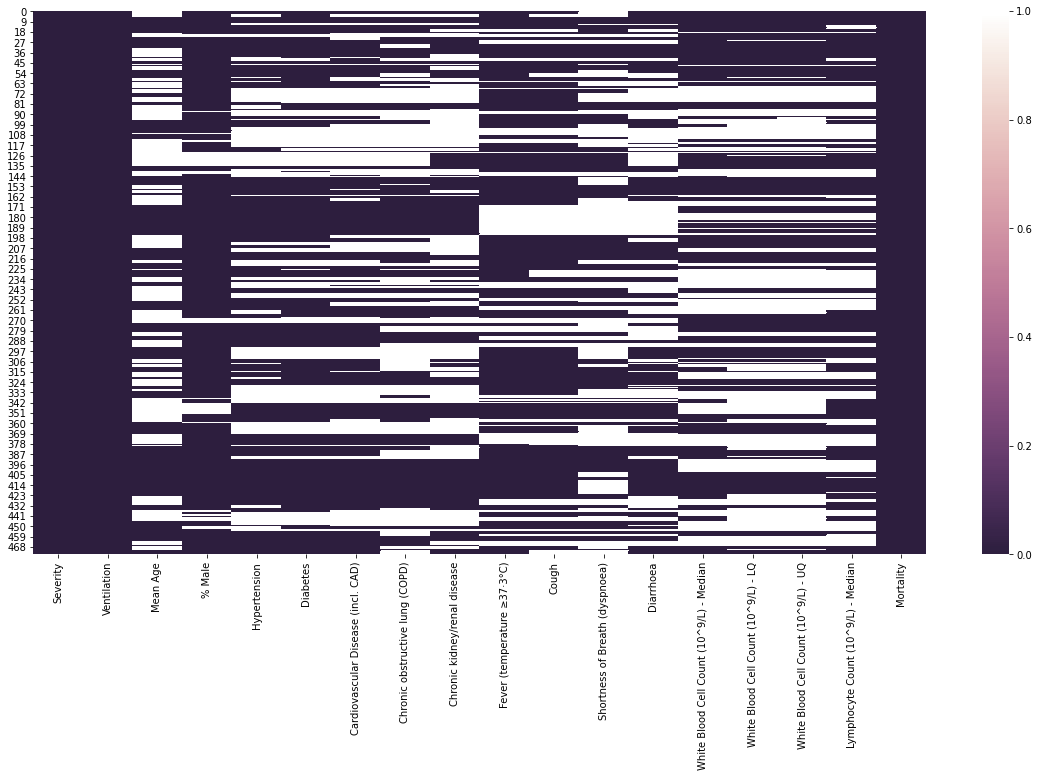

In [15]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(filtered_data.isna(), cmap=cmap)

### Replacing Any Data Of String Type With NaN

In [16]:
for column in filtered_data.iloc[:,2:].columns:
    for i in range(0,len(training_data[column])):
        if(type(filtered_data[column][i]) == str):
            filtered_data[column][i] = float('NaN')

### Filling Numerical Missing Values With Mean

In [17]:
for column in filtered_data.iloc[:,2:-1].columns:
    mean = filtered_data[column].mean()
    print(column,mean)
    filtered_data[column].fillna(filtered_data[column].mean(),inplace=True)

Mean Age 51.09353615834524
% Male 0.5474132558139535
Hypertension 0.2866618122977346
Diabetes 0.14779046153846156
Cardiovascular Disease (incl. CAD) 0.14217966101694915
Chronic obstructive lung (COPD) 0.06628320610687023
Chronic kidney/renal disease 0.0447444
Fever (temperature ≥37·3°C) 0.7061761235955056
Cough 0.6037155882352941
Shortness of Breath (dyspnoea) 0.28827407407407407
Diarrhoea 0.14476230769230775
White Blood Cell Count (10^9/L) - Median 6.058345070422535
White Blood Cell Count (10^9/L) - LQ 4.751225296442687
White Blood Cell Count (10^9/L) - UQ 7.706294820717132
Lymphocyte Count (10^9/L) - Median 1.587923875432526


### Visualizing Remaining Missing Data

<AxesSubplot:>

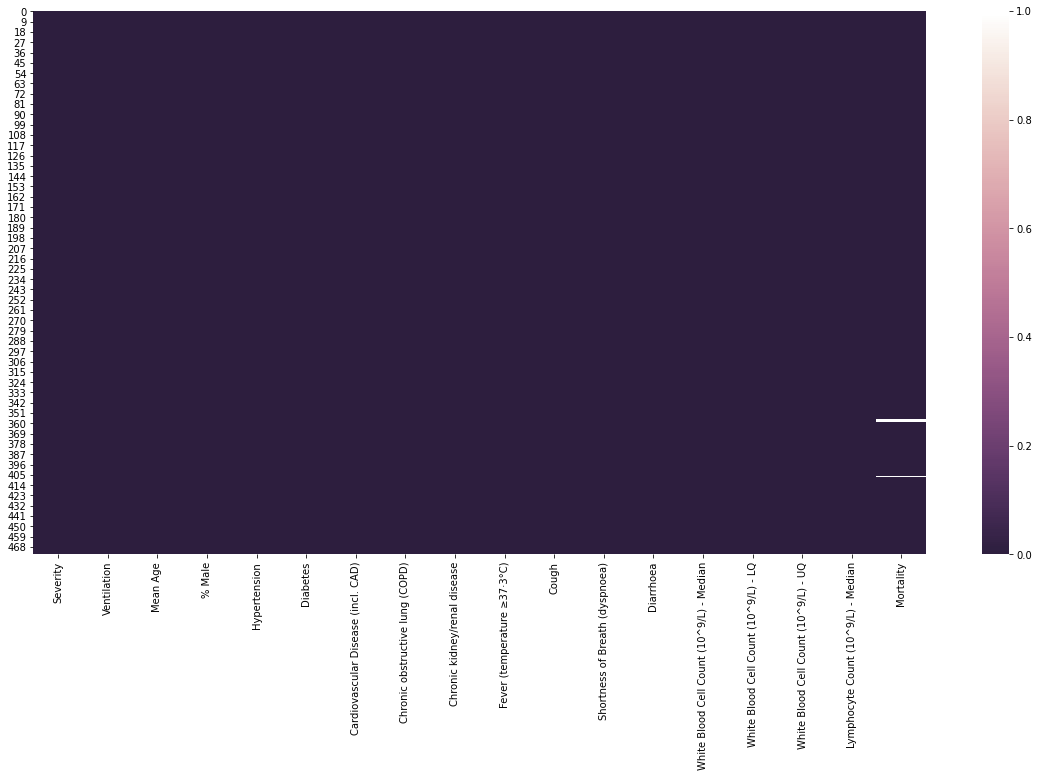

In [18]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(filtered_data.isna(), cmap=cmap)

### Removing Indexes Where Mortality is NaN

In [19]:
filtered_data = filtered_data.dropna()
filtered_data = filtered_data.reset_index(drop=True)
filtered_data

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Mortality
0,All,Both,51.093536,0.6230,0.300000,0.1900,0.08000,0.030000,0.016800,0.9400,0.790000,0.288274,0.0471,6.20,4.500000,9.500000,1.00,0.28
1,Severe/Critical Only,Both,51.093536,0.7037,0.481500,0.3148,0.24070,0.074100,0.037000,0.9444,0.722200,0.288274,0.0370,9.80,6.900000,13.900000,0.60,1
2,All,Both,51.093536,0.5912,0.233600,0.1387,0.01460,0.014600,0.000000,0.9416,0.817500,0.288274,0.0511,5.20,4.300000,7.700000,1.10,0
3,All,Both,51.093536,0.6030,0.286662,0.1160,0.14218,0.066283,0.044744,0.9150,0.603716,0.288274,0.0206,7.00,5.100000,9.400000,0.90,0.16
4,All,Both,51.093536,0.6160,0.286662,0.1010,0.14218,0.066283,0.044744,0.8990,0.603716,0.288274,0.0420,7.30,5.300000,9.600000,0.80,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Severe/Critical Only,Both,51.093536,0.6630,0.388000,0.1220,0.09200,0.066283,0.044744,0.8570,0.704000,0.288274,0.0510,6.92,5.100000,11.960000,0.58,0.56
467,All,Both,51.093536,0.6600,0.630000,0.3600,0.19000,0.090000,0.140000,0.7100,0.660000,0.740000,0.1200,9.80,4.751225,7.706295,0.80,0.58
468,Severe/Critical Only,Both,65.000000,0.5900,0.433600,0.2368,0.07020,0.066283,0.000000,0.3665,0.603716,0.288274,0.0300,6.30,4.400000,8.300000,0.80,1
469,Severe/Critical Only,Both,66.000000,0.5600,0.460000,0.2500,0.09000,0.066283,0.000000,0.3500,0.603716,0.288274,0.0300,6.20,4.400000,8.300000,0.80,0


### Visualizing Remaining Missing Data

<AxesSubplot:>

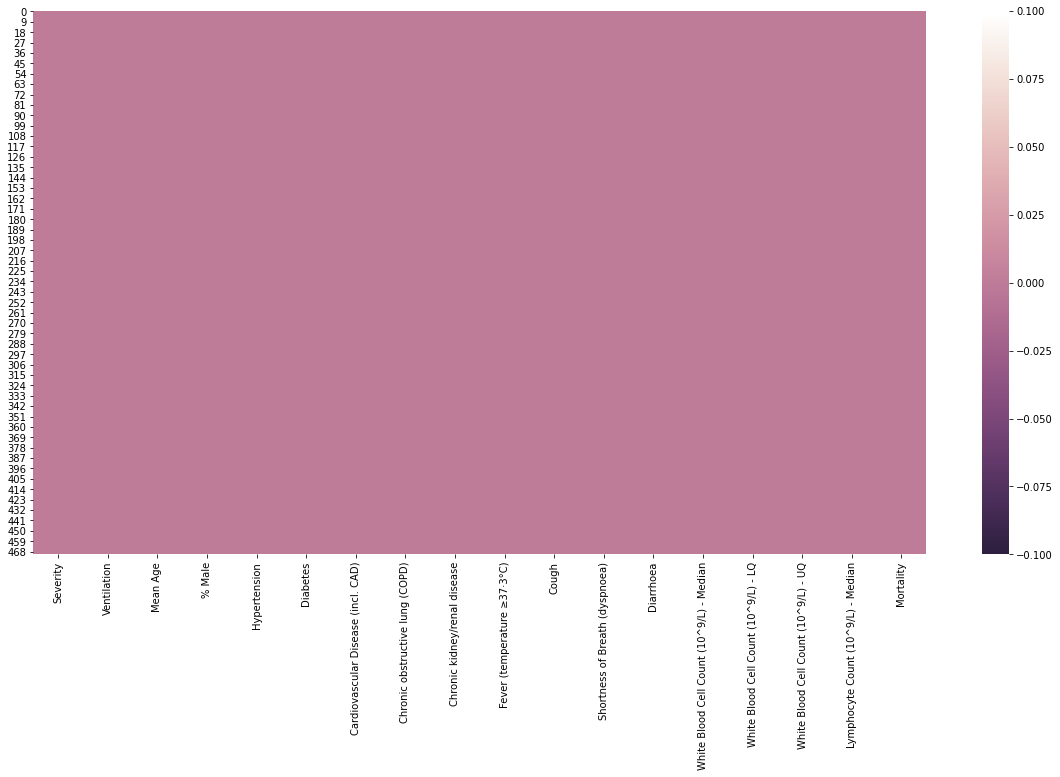

In [20]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(filtered_data.isna(), cmap=cmap)

### Encoding Categorical Data Into Numerical Data

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
filtered_data.iloc[:,0] = label_encoder.fit_transform(filtered_data.iloc[:,0]).astype('float64')

label_encoder = LabelEncoder()
filtered_data.iloc[:,1] = label_encoder.fit_transform(filtered_data.iloc[:,1]).astype('float64')

filtered_data.head(10)

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Mortality
0,0.0,0.0,51.093536,0.6230,0.300000,0.1900,0.08000,0.030000,0.016800,0.9400,0.790000,0.288274,0.0471,6.2,4.5,9.5,1.0,0.28
1,6.0,0.0,51.093536,0.7037,0.481500,0.3148,0.24070,0.074100,0.037000,0.9444,0.722200,0.288274,0.0370,9.8,6.9,13.9,0.6,1
2,0.0,0.0,51.093536,0.5912,0.233600,0.1387,0.01460,0.014600,0.000000,0.9416,0.817500,0.288274,0.0511,5.2,4.3,7.7,1.1,0
3,0.0,0.0,51.093536,0.6030,0.286662,0.1160,0.14218,0.066283,0.044744,0.9150,0.603716,0.288274,0.0206,7.0,5.1,9.4,0.9,0.16
4,0.0,0.0,51.093536,0.6160,0.286662,0.1010,0.14218,0.066283,0.044744,0.8990,0.603716,0.288274,0.0420,7.3,5.3,9.6,0.8,0.15
5,0.0,0.0,51.093536,0.5900,0.286662,0.1300,0.14218,0.066283,0.044744,0.9300,0.603716,0.288274,0.0000,6.9,4.9,9.1,0.9,0.17
6,0.0,0.0,49.500000,0.5200,0.150000,0.1200,0.10000,0.110000,0.040000,0.7300,0.590000,0.420000,0.0400,8.1,4.7,11.5,1.1,0.04
7,0.0,0.0,44.900000,0.2700,0.130000,0.2000,0.20000,0.070000,0.000000,0.0000,0.000000,0.000000,0.0000,8.0,5.5,10.5,1.1,0
8,0.0,0.0,48.800000,0.5200,0.050000,0.1000,0.05000,0.140000,0.000000,0.8600,0.710000,0.430000,0.0500,7.8,4.2,11.4,1.0,0
9,0.0,0.0,52.300000,0.6700,0.230000,0.1000,0.10000,0.100000,0.100000,0.9000,0.700000,0.430000,0.0300,8.4,4.9,11.9,1.1,0.07


### Converting All Data Columns To Data Type Float

In [22]:
for column in filtered_data.columns:
    filtered_data[column] = filtered_data[column].apply(lambda x: float(x))
filtered_data

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Mortality
0,0.0,0.0,51.093536,0.6230,0.300000,0.1900,0.08000,0.030000,0.016800,0.9400,0.790000,0.288274,0.0471,6.20,4.500000,9.500000,1.00,0.28
1,6.0,0.0,51.093536,0.7037,0.481500,0.3148,0.24070,0.074100,0.037000,0.9444,0.722200,0.288274,0.0370,9.80,6.900000,13.900000,0.60,1.00
2,0.0,0.0,51.093536,0.5912,0.233600,0.1387,0.01460,0.014600,0.000000,0.9416,0.817500,0.288274,0.0511,5.20,4.300000,7.700000,1.10,0.00
3,0.0,0.0,51.093536,0.6030,0.286662,0.1160,0.14218,0.066283,0.044744,0.9150,0.603716,0.288274,0.0206,7.00,5.100000,9.400000,0.90,0.16
4,0.0,0.0,51.093536,0.6160,0.286662,0.1010,0.14218,0.066283,0.044744,0.8990,0.603716,0.288274,0.0420,7.30,5.300000,9.600000,0.80,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,6.0,0.0,51.093536,0.6630,0.388000,0.1220,0.09200,0.066283,0.044744,0.8570,0.704000,0.288274,0.0510,6.92,5.100000,11.960000,0.58,0.56
467,0.0,0.0,51.093536,0.6600,0.630000,0.3600,0.19000,0.090000,0.140000,0.7100,0.660000,0.740000,0.1200,9.80,4.751225,7.706295,0.80,0.58
468,6.0,0.0,65.000000,0.5900,0.433600,0.2368,0.07020,0.066283,0.000000,0.3665,0.603716,0.288274,0.0300,6.30,4.400000,8.300000,0.80,1.00
469,6.0,0.0,66.000000,0.5600,0.460000,0.2500,0.09000,0.066283,0.000000,0.3500,0.603716,0.288274,0.0300,6.20,4.400000,8.300000,0.80,0.00


### Creating Correlation Matrix

In [23]:
corr_mat = filtered_data.corr()
corr_mat

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Mortality
Severity,1.000000,0.263747,0.254292,0.086555,0.212310,0.142487,0.122305,0.017089,-0.065600,0.095787,0.059189,0.243022,0.028005,0.062566,0.093595,0.006628,-0.006120,0.349283
Ventilation,0.263747,1.000000,-0.029769,0.061770,-0.091824,-0.172984,-0.026682,-0.050648,-0.017453,0.059369,0.072252,0.189145,0.148295,0.015113,0.051995,-0.025686,0.042964,-0.155389
Mean Age,0.254292,-0.029769,1.000000,-0.027555,0.317461,0.228389,0.345200,0.179763,0.166333,0.115886,0.177170,0.146477,-0.159984,-0.062546,-0.145511,0.022002,-0.188840,0.410720
% Male,0.086555,0.061770,-0.027555,1.000000,0.107033,-0.153411,0.066492,0.060226,0.070268,0.090593,0.071746,0.124070,0.145009,0.127086,0.058235,0.112432,0.165859,0.006044
Hypertension,0.212310,-0.091824,0.317461,0.107033,1.000000,0.273179,0.366691,0.045187,0.111869,0.092072,-0.000449,0.175734,-0.091554,0.043274,0.035685,0.024074,-0.146032,0.431240
Diabetes,0.142487,-0.172984,0.228389,-0.153411,0.273179,1.000000,0.169706,0.271214,0.075902,-0.001334,-0.013440,0.098357,-0.089538,0.049708,0.033062,0.038385,-0.123285,0.317498
Cardiovascular Disease (incl. CAD),0.122305,-0.026682,0.345200,0.066492,0.366691,0.169706,1.000000,0.256675,0.375298,0.004881,-0.005342,0.006503,0.019677,0.014902,0.004420,0.002039,-0.072988,0.343782
Chronic obstructive lung (COPD),0.017089,-0.050648,0.179763,0.060226,0.045187,0.271214,0.256675,1.000000,0.156081,-0.072078,0.027789,0.033428,-0.077566,0.090823,0.053359,0.071037,-0.060870,0.132288
Chronic kidney/renal disease,-0.065600,-0.017453,0.166333,0.070268,0.111869,0.075902,0.375298,0.156081,1.000000,0.020813,0.029490,0.068283,0.041391,0.024890,-0.015820,-0.005064,-0.056414,0.117549
Fever (temperature ≥37·3°C),0.095787,0.059369,0.115886,0.090593,0.092072,-0.001334,0.004881,-0.072078,0.020813,1.000000,0.474894,0.218095,0.183259,-0.052833,-0.053849,-0.044999,0.035654,0.073851


### Removing Any One Data Column Where Correlation Is Greater Than Or Equal To 0.9

In [24]:
columns = np.full((corr_mat.shape[0],), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = filtered_data.columns[columns]
filtered_data = filtered_data[selected_columns]
filtered_data

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Mortality
0,0.0,0.0,51.093536,0.6230,0.300000,0.1900,0.08000,0.030000,0.016800,0.9400,0.790000,0.288274,0.0471,6.20,4.500000,9.500000,1.00,0.28
1,6.0,0.0,51.093536,0.7037,0.481500,0.3148,0.24070,0.074100,0.037000,0.9444,0.722200,0.288274,0.0370,9.80,6.900000,13.900000,0.60,1.00
2,0.0,0.0,51.093536,0.5912,0.233600,0.1387,0.01460,0.014600,0.000000,0.9416,0.817500,0.288274,0.0511,5.20,4.300000,7.700000,1.10,0.00
3,0.0,0.0,51.093536,0.6030,0.286662,0.1160,0.14218,0.066283,0.044744,0.9150,0.603716,0.288274,0.0206,7.00,5.100000,9.400000,0.90,0.16
4,0.0,0.0,51.093536,0.6160,0.286662,0.1010,0.14218,0.066283,0.044744,0.8990,0.603716,0.288274,0.0420,7.30,5.300000,9.600000,0.80,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,6.0,0.0,51.093536,0.6630,0.388000,0.1220,0.09200,0.066283,0.044744,0.8570,0.704000,0.288274,0.0510,6.92,5.100000,11.960000,0.58,0.56
467,0.0,0.0,51.093536,0.6600,0.630000,0.3600,0.19000,0.090000,0.140000,0.7100,0.660000,0.740000,0.1200,9.80,4.751225,7.706295,0.80,0.58
468,6.0,0.0,65.000000,0.5900,0.433600,0.2368,0.07020,0.066283,0.000000,0.3665,0.603716,0.288274,0.0300,6.30,4.400000,8.300000,0.80,1.00
469,6.0,0.0,66.000000,0.5600,0.460000,0.2500,0.09000,0.066283,0.000000,0.3500,0.603716,0.288274,0.0300,6.20,4.400000,8.300000,0.80,0.00


### Independent Variables

In [25]:
X = filtered_data.iloc[:,:-1]
X

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median
0,0.0,0.0,51.093536,0.6230,0.300000,0.1900,0.08000,0.030000,0.016800,0.9400,0.790000,0.288274,0.0471,6.20,4.500000,9.500000,1.00
1,6.0,0.0,51.093536,0.7037,0.481500,0.3148,0.24070,0.074100,0.037000,0.9444,0.722200,0.288274,0.0370,9.80,6.900000,13.900000,0.60
2,0.0,0.0,51.093536,0.5912,0.233600,0.1387,0.01460,0.014600,0.000000,0.9416,0.817500,0.288274,0.0511,5.20,4.300000,7.700000,1.10
3,0.0,0.0,51.093536,0.6030,0.286662,0.1160,0.14218,0.066283,0.044744,0.9150,0.603716,0.288274,0.0206,7.00,5.100000,9.400000,0.90
4,0.0,0.0,51.093536,0.6160,0.286662,0.1010,0.14218,0.066283,0.044744,0.8990,0.603716,0.288274,0.0420,7.30,5.300000,9.600000,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,6.0,0.0,51.093536,0.6630,0.388000,0.1220,0.09200,0.066283,0.044744,0.8570,0.704000,0.288274,0.0510,6.92,5.100000,11.960000,0.58
467,0.0,0.0,51.093536,0.6600,0.630000,0.3600,0.19000,0.090000,0.140000,0.7100,0.660000,0.740000,0.1200,9.80,4.751225,7.706295,0.80
468,6.0,0.0,65.000000,0.5900,0.433600,0.2368,0.07020,0.066283,0.000000,0.3665,0.603716,0.288274,0.0300,6.30,4.400000,8.300000,0.80
469,6.0,0.0,66.000000,0.5600,0.460000,0.2500,0.09000,0.066283,0.000000,0.3500,0.603716,0.288274,0.0300,6.20,4.400000,8.300000,0.80


### Dependent Variable

In [26]:
y = filtered_data.iloc[:,-1]
y

0      0.28
1      1.00
2      0.00
3      0.16
4      0.15
       ... 
466    0.56
467    0.58
468    1.00
469    0.00
470    0.00
Name: Mortality, Length: 471, dtype: float64

### Splitting Training and Testing Data

In [27]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2)

### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

In [29]:
X_train

array([[ 1.20645541e+00, -5.01924547e-01,  3.45240047e-03, ...,
        -1.27445372e-02, -3.34283105e-03,  3.99141465e-03],
       [-1.01720750e+00, -5.01924547e-01, -3.45695044e+00, ...,
        -1.27445372e-02, -3.34283105e-03,  3.99141465e-03],
       [-1.01720750e+00, -5.01924547e-01, -3.15890305e+00, ...,
        -1.27445372e-02, -3.34283105e-03,  3.99141465e-03],
       ...,
       [ 1.20645541e+00, -5.01924547e-01,  3.01243110e+00, ...,
        -7.07087196e-01, -1.65578243e+00, -6.97905373e-02],
       [ 1.20645541e+00, -5.01924547e-01,  3.45240047e-03, ...,
        -1.14302244e+00,  1.65215325e+00, -4.62406706e-01],
       [ 1.20645541e+00, -5.01924547e-01,  3.45240047e-03, ...,
        -1.66482371e+00, -1.59391331e+00, -4.23145089e-01]])

In [30]:
X_test

array([[ 1.20645541, -0.50192455,  0.0034524 , ..., -0.01274454,
        -0.00334283,  0.00399141],
       [-1.0172075 , -0.50192455, -0.84465274, ..., -0.57498561,
        -0.83086081, -0.226837  ],
       [-1.0172075 , -0.50192455,  0.0034524 , ..., -0.01274454,
        -0.00334283, -0.14831377],
       ...,
       [-1.0172075 , -0.50192455, -0.42387996, ..., -1.10339196,
        -0.66587649, -0.226837  ],
       [-1.0172075 , -0.50192455,  0.0034524 , ..., -0.01274454,
        -0.00334283, -0.38780963],
       [ 1.20645541,  3.05889866, -0.35375116, ..., -0.01274454,
        -0.00334283,  0.00399141]])

## Creating Machine Learning Model

### Support Vector Regressor (SVR) Model

In [31]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train,y_train)

SVR()

In [32]:
print("Initial Model Score : {}".format(svm_model.score(X_test,y_test)))

Initial Model Score : 0.21452621816329065


### Hyperparameter Tuning Using Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [3], 'gamma': [0.6],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=3, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END ........................C=3, gamma=0.6, kernel=poly; total time=   0.0s
[CV] END ........................C=3, gamma=0.6, kernel=poly; total time=   0.0s
[CV] END ........................C=3, gamma=0.6, kernel=poly; total time=   0.0s
[CV] END ........................C=3, gamma=0.6, kernel=poly; total time=   0.0s
[CV] END ........................C=3, gamma=0.6, kernel=poly; total time=   0.0s
[CV] END .....................C=3, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=3, gamma=0.6, ker

GridSearchCV(estimator=SVR(),
             param_grid={'C': [3], 'gamma': [0.6],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

### Best Hyperparameter Values

In [34]:
print(grid.best_estimator_)

SVR(C=3, gamma=0.6)


### Training SVR Model Using Above Hyperparameters

In [35]:
svr_model = SVR()
svr_model.fit(X_train,y_train)
svr_model.score(X_test,y_test)

0.21452621816329065

### Importing Test Data For Result Prediction

In [36]:
# Predicting Test Data
test_data = pd.read_excel('test_data.xlsx')
test_data.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Unnamed: 54,Unnamed: 55
0,155,Mild only,Both,48.900000,0.3410,0.325,0.1510,0.1190,0.0630,NaN,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Severe/Critical Only,Both,NaN,0.7500,0.680,0.2500,0.1700,0.1100,0.1100,...,36.0,NaN,1.0,NaN,0.06,NaN,10.0,16.0,NaN,NaN
2,156,Severe/Critical Only,Ventilation only,NaN,0.7900,0.740,0.2600,0.2400,0.1800,0.1500,...,39.0,NaN,1.0,NaN,0.05,NaN,12.0,17.0,NaN,NaN
3,156,Severe/Critical Only,Non-ventilation only,NaN,0.6800,0.580,0.2100,0.0500,0.0000,0.0500,...,35.0,NaN,1.0,NaN,0.06,NaN,0.0,13.0,NaN,NaN
4,157,All,Both,52.943333,0.4654,NaN,0.2121,0.0938,0.0733,0.0327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtering Required Columns From Test Data

In [37]:
filtered_test_data = pd.DataFrame()
for column in filtered_data.iloc[:,:-1].columns:
    filtered_test_data[column] = test_data[column]
filtered_test_data.head(10)

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median
0,Mild only,Both,48.900000,0.3410,0.1510,0.1190,0.0630,NaN,0.032,0.7300,0.6110,NaN,0.2220,4.50,NaN,NaN,1.30
1,Severe/Critical Only,Both,NaN,0.7500,0.2500,0.1700,0.1100,0.1100,NaN,NaN,NaN,NaN,0.0900,NaN,NaN,NaN,NaN
2,Severe/Critical Only,Ventilation only,NaN,0.7900,0.2600,0.2400,0.1800,0.1500,NaN,NaN,NaN,NaN,0.0300,NaN,NaN,NaN,NaN
3,Severe/Critical Only,Non-ventilation only,NaN,0.6800,0.2100,0.0500,0.0000,0.0500,NaN,NaN,NaN,NaN,0.2100,NaN,NaN,NaN,NaN
4,All,Both,52.943333,0.4654,0.2121,0.0938,0.0733,0.0327,NaN,0.8080,0.5715,0.1835,0.0736,5.53,NaN,NaN,0.98
5,All,Both,44.740000,0.2927,0.1341,0.0610,0.0610,0.0244,NaN,0.7439,0.4756,0.0976,0.0732,3.86,NaN,NaN,1.39
6,All,Both,52.680000,0.4938,0.1728,0.0741,0.0370,0.0494,NaN,0.7654,0.6049,0.1235,0.0988,4.23,NaN,NaN,0.92
7,All,Both,61.410000,0.6098,0.3293,0.1463,0.1220,0.0244,NaN,0.9146,0.6341,0.3293,0.0488,8.49,NaN,NaN,0.62
8,All,Both,36.020000,0.5198,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,4.98,NaN,NaN,1.26
9,All,Both,40.500000,0.5880,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,5.20,NaN,NaN,1.10


### Test Data Preprocessing

### Missing Test Data

In [38]:
filtered_test_data.isna().sum()

Severity                                     0
Ventilation                                  7
Mean Age                                    17
% Male                                       8
Hypertension                                27
Diabetes                                    23
Cardiovascular Disease (incl. CAD)          18
Chronic obstructive lung (COPD)             29
Chronic kidney/renal disease                37
Fever (temperature ≥37·3°C)                 16
Cough                                       27
Shortness of Breath (dyspnoea)              36
Diarrhoea                                   27
White Blood Cell Count (10^9/L) - Median    35
White Blood Cell Count (10^9/L) - LQ        43
White Blood Cell Count (10^9/L) - UQ        43
Lymphocyte Count (10^9/L) - Median          35
dtype: int64

### Filling Missing Categorical Data With Mode

In [39]:
filtered_test_data['Ventilation'].fillna(str(filtered_test_data['Ventilation'].mode()[0]),inplace=True)
filtered_test_data.isna().sum()

Severity                                     0
Ventilation                                  0
Mean Age                                    17
% Male                                       8
Hypertension                                27
Diabetes                                    23
Cardiovascular Disease (incl. CAD)          18
Chronic obstructive lung (COPD)             29
Chronic kidney/renal disease                37
Fever (temperature ≥37·3°C)                 16
Cough                                       27
Shortness of Breath (dyspnoea)              36
Diarrhoea                                   27
White Blood Cell Count (10^9/L) - Median    35
White Blood Cell Count (10^9/L) - LQ        43
White Blood Cell Count (10^9/L) - UQ        43
Lymphocyte Count (10^9/L) - Median          35
dtype: int64

### Filling Missing Numerical Data With Mean

In [40]:
for column in filtered_test_data.iloc[:,2:].columns:
    mean = filtered_test_data[column].mean()
    filtered_test_data[column].fillna(mean,inplace=True)
    print(column,mean)

Mean Age 47.260925925833334
% Male 0.5745955555555555
Hypertension 0.30220384615384616
Diabetes 0.23368333333333335
Cardiovascular Disease (incl. CAD) 0.16597142857142858
Chronic obstructive lung (COPD) 0.07844583333333334
Chronic kidney/renal disease 0.0261875
Fever (temperature ≥37·3°C) 0.6388324324324325
Cough 0.5506307692307691
Shortness of Breath (dyspnoea) 0.33307058823529406
Diarrhoea 0.18479615384615383
White Blood Cell Count (10^9/L) - Median 5.550000000000001
White Blood Cell Count (10^9/L) - LQ 4.15
White Blood Cell Count (10^9/L) - UQ 8.113
Lymphocyte Count (10^9/L) - Median 1.0516666666666665


### Encoding Categorical Test Data

In [41]:
label_encoder = LabelEncoder()
filtered_test_data.iloc[:,0] = label_encoder.fit_transform(filtered_test_data.iloc[:,0]).astype('float64')
label_encoder = LabelEncoder()
filtered_test_data.iloc[:,1] = label_encoder.fit_transform(filtered_test_data.iloc[:,1]).astype('float64')
filtered_test_data.head(10)

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median
0,3.0,0.0,48.900000,0.3410,0.151000,0.119000,0.063000,0.078446,0.032000,0.730000,0.611000,0.333071,0.222000,4.50,4.15,8.113,1.300000
1,4.0,0.0,47.260926,0.7500,0.250000,0.170000,0.110000,0.110000,0.026187,0.638832,0.550631,0.333071,0.090000,5.55,4.15,8.113,1.051667
2,4.0,2.0,47.260926,0.7900,0.260000,0.240000,0.180000,0.150000,0.026187,0.638832,0.550631,0.333071,0.030000,5.55,4.15,8.113,1.051667
3,4.0,1.0,47.260926,0.6800,0.210000,0.050000,0.000000,0.050000,0.026187,0.638832,0.550631,0.333071,0.210000,5.55,4.15,8.113,1.051667
4,0.0,0.0,52.943333,0.4654,0.212100,0.093800,0.073300,0.032700,0.026187,0.808000,0.571500,0.183500,0.073600,5.53,4.15,8.113,0.980000
5,0.0,0.0,44.740000,0.2927,0.134100,0.061000,0.061000,0.024400,0.026187,0.743900,0.475600,0.097600,0.073200,3.86,4.15,8.113,1.390000
6,0.0,0.0,52.680000,0.4938,0.172800,0.074100,0.037000,0.049400,0.026187,0.765400,0.604900,0.123500,0.098800,4.23,4.15,8.113,0.920000
7,0.0,0.0,61.410000,0.6098,0.329300,0.146300,0.122000,0.024400,0.026187,0.914600,0.634100,0.329300,0.048800,8.49,4.15,8.113,0.620000
8,0.0,0.0,36.020000,0.5198,0.302204,0.233683,0.165971,0.078446,0.026187,1.000000,0.550631,0.333071,0.184796,4.98,4.15,8.113,1.260000
9,0.0,0.0,40.500000,0.5880,0.302204,0.233683,0.165971,0.078446,0.026187,1.000000,0.550631,0.333071,0.184796,5.20,4.15,8.113,1.100000


### Converting Every Value to type float64

In [42]:
for column in filtered_test_data.columns:
    filtered_test_data[column] = filtered_test_data[column].apply(lambda x: float(x))
filtered_test_data.head(10)

,Severity,Ventilation,Mean Age,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Diarrhoea,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median
0,3.0,0.0,48.900000,0.3410,0.151000,0.119000,0.063000,0.078446,0.032000,0.730000,0.611000,0.333071,0.222000,4.50,4.15,8.113,1.300000
1,4.0,0.0,47.260926,0.7500,0.250000,0.170000,0.110000,0.110000,0.026187,0.638832,0.550631,0.333071,0.090000,5.55,4.15,8.113,1.051667
2,4.0,2.0,47.260926,0.7900,0.260000,0.240000,0.180000,0.150000,0.026187,0.638832,0.550631,0.333071,0.030000,5.55,4.15,8.113,1.051667
3,4.0,1.0,47.260926,0.6800,0.210000,0.050000,0.000000,0.050000,0.026187,0.638832,0.550631,0.333071,0.210000,5.55,4.15,8.113,1.051667
4,0.0,0.0,52.943333,0.4654,0.212100,0.093800,0.073300,0.032700,0.026187,0.808000,0.571500,0.183500,0.073600,5.53,4.15,8.113,0.980000
5,0.0,0.0,44.740000,0.2927,0.134100,0.061000,0.061000,0.024400,0.026187,0.743900,0.475600,0.097600,0.073200,3.86,4.15,8.113,1.390000
6,0.0,0.0,52.680000,0.4938,0.172800,0.074100,0.037000,0.049400,0.026187,0.765400,0.604900,0.123500,0.098800,4.23,4.15,8.113,0.920000
7,0.0,0.0,61.410000,0.6098,0.329300,0.146300,0.122000,0.024400,0.026187,0.914600,0.634100,0.329300,0.048800,8.49,4.15,8.113,0.620000
8,0.0,0.0,36.020000,0.5198,0.302204,0.233683,0.165971,0.078446,0.026187,1.000000,0.550631,0.333071,0.184796,4.98,4.15,8.113,1.260000
9,0.0,0.0,40.500000,0.5880,0.302204,0.233683,0.165971,0.078446,0.026187,1.000000,0.550631,0.333071,0.184796,5.20,4.15,8.113,1.100000


### Scaling Complete Training Data

In [43]:
new_scaler = StandardScaler()
scaled_X = new_scaler.fit_transform(X.values)
scaled_X

array([[-9.93226749e-01, -4.85601340e-01,  1.86600157e-03, ...,
        -1.64979192e-01,  7.38454333e-01, -2.23454902e-01],
       [ 1.23798056e+00, -4.85601340e-01,  1.86600157e-03, ...,
         1.43941811e+00,  2.55175914e+00, -3.78002967e-01],
       [-9.93226749e-01, -4.85601340e-01,  1.86600157e-03, ...,
        -2.98678967e-01, -3.35217740e-03, -1.84817886e-01],
       ...,
       [ 1.23798056e+00, -4.85601340e-01,  1.02838461e+00, ...,
        -2.31829080e-01,  2.43916659e-01, -3.00728934e-01],
       [ 1.23798056e+00, -4.85601340e-01,  1.10220054e+00, ...,
        -2.31829080e-01,  2.43916659e-01, -3.00728934e-01],
       [ 1.23798056e+00, -4.85601340e-01,  9.54568675e-01, ...,
        -1.64979192e-01,  2.43916659e-01, -3.39365950e-01]])

### Scaling Test Data

In [44]:
scaled_test_data = new_scaler.transform(filtered_test_data.values)
scaled_test_data

array([[ 0.1223769 , -0.48560134, -0.16005192, -0.82692034, -0.5816072 ,
        -0.17616788, -0.41752693,  0.10816176, -0.15215027,  0.09460045,
         0.03359744,  0.20739614,  0.41002569, -0.91719662, -0.3989538 ,
         0.16685121, -0.10754385],
       [ 0.49424479, -0.48560134, -0.2810417 ,  0.81362158, -0.15313   ,
         0.12911929, -0.17062975,  0.38902336, -0.22102993, -0.25817264,
        -0.21600959,  0.20739614, -0.29351196, -0.2997888 , -0.3989538 ,
         0.16685121, -0.20349244],
       [ 0.49424479,  1.33685468, -0.2810417 ,  0.97406578, -0.10984947,
         0.5481409 ,  0.19708947,  0.74506079, -0.22102993, -0.25817264,
        -0.21600959,  0.20739614, -0.6133018 , -0.2997888 , -0.3989538 ,
         0.16685121, -0.20349244],
       [ 0.49424479,  0.42562667, -0.2810417 ,  0.53284424, -0.3262521 ,
        -0.58920347, -0.74847423, -0.14503277, -0.22102993, -0.25817264,
        -0.21600959,  0.20739614,  0.34606773, -0.2997888 , -0.3989538 ,
         0.16685121

### Training SVR Model On Complete Training Data

In [45]:
svr_model = SVR()
svr_model.fit(scaled_X,y)

SVR()

### Predicting Result Values

In [46]:
predicted_values = svr_model.predict(scaled_test_data)
predicted_values

array([0.07252611, 0.09179954, 0.12903656, 0.03082903, 0.09966621,
       0.11044199, 0.10200953, 0.12333603, 0.10317612, 0.1024752 ,
       0.12512531, 0.09538683, 0.05061226, 0.41913143, 0.04394193,
       0.06873653, 0.04200144, 0.52731473, 0.09033902, 0.18533355,
       0.52281871, 0.09417847, 0.11133344, 0.58870676, 0.08207824,
       0.08873919, 0.08088877, 0.11084625, 0.0887735 , 0.09623006,
       0.21775741, 0.10828818, 0.11747509, 0.08334885, 0.1089499 ,
       0.12831207, 0.20544682, 0.17006464, 0.24443771, 0.10240421,
       0.13531814, 0.10518328, 0.10518328, 0.10518328, 0.07545537,
       0.08356072, 0.0394276 , 0.10500315, 0.29479408, 0.37425638,
       0.2199511 , 0.30250657, 0.20297471])

## Results

In [47]:
results = pd.DataFrame()
results['ID'] = test_data['ID']
results['Mortality'] = predicted_values
results

,ID,Mortality
0,155,0.072526
1,156,0.091800
2,156,0.129037
3,156,0.030829
4,157,0.099666
5,157,0.110442
6,157,0.102010
7,157,0.123336
8,158,0.103176
9,158,0.102475


### Exporting results

In [49]:
results.to_csv('result-mortality-rates.csv',index=False)